In [4]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
file_path = r"../Renata/datos/tickets_classification_eng.json"

with open(file_path, "r") as file:  
    tickets = json.load(file)

df = pd.json_normalize(tickets)

In [6]:
df = df[['_source.complaint_what_happened', '_source.product', '_source.sub_product']]
df = df.rename(columns={'_source.complaint_what_happened':'complaint_what_happened',
                '_source.product':'category',
                '_source.sub_product':'sub_product'
                })

df['ticket_classification'] = df['category'] + " + " + df['sub_product']
df = df.drop(['category', 'sub_product'], axis=1)

df.drop(df[df['complaint_what_happened'] == ""].index, inplace=True)

df = df.reindex()

In [7]:
df['complaint_what_happened'] = df['complaint_what_happened'].str.lower()
df['complaint_what_happened'] = df['complaint_what_happened'].str.replace('x', '', regex=False)
df['complaint_what_happened'] = df['complaint_what_happened'].str.replace(r'[^a-zA-Z0-9 ]', '', regex=True)

df.to_csv(r"../Renata/datos/cleaned.csv", index=False)

/var/folders/2x/ywqv7yz10h9cq_ql_b4l1vpw0000gn/T/ipykernel_24634/4147980196.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ticket_classification', data=df, palette='tab10')


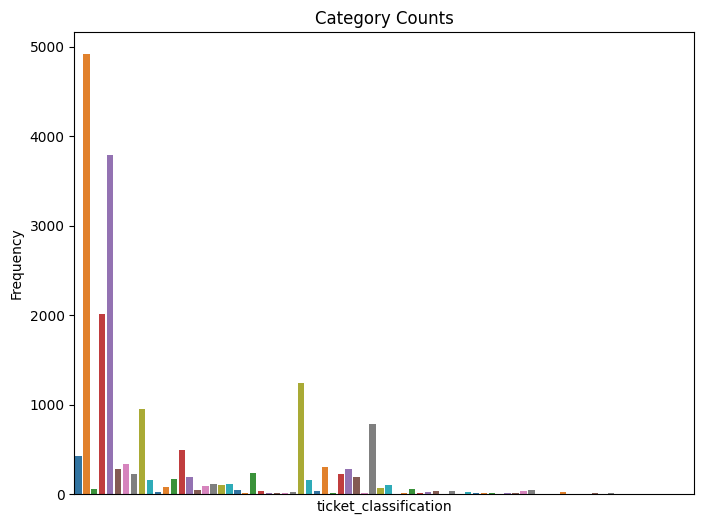

In [8]:
plt.figure(figsize=(8, 6))
sns.countplot(x='ticket_classification', data=df, palette='tab10')
plt.ylabel('Frequency')
plt.title('Category Counts')
plt.xticks([])
plt.show()

In [9]:
df['text_length'] = df['complaint_what_happened'].apply(lambda x: len(str(x)))

average_length = df['text_length'].mean()
min_length = df['text_length'].min()
max_length = df['text_length'].max()

print(f"Average Text Length: {average_length}")
print(f"Minimum Text Length: {min_length}")
print(f"Maximum Text Length: {max_length}")

Average Text Length: 1290.6856492027334
Minimum Text Length: 19
Maximum Text Length: 30261


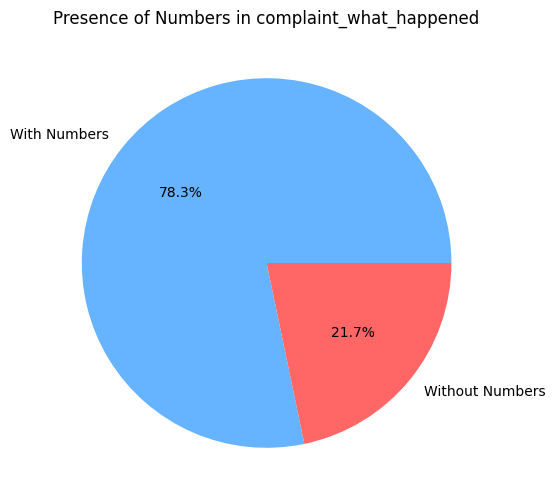

In [10]:
number_counts = df['complaint_what_happened'].apply(lambda x: any(char.isdigit() for char in str(x))).value_counts()

plt.figure(figsize=(6, 6))
plt.pie(number_counts, labels=['With Numbers', 'Without Numbers'], autopct='%1.1f%%', colors=['#66b3ff', '#ff6666'])
plt.title('Presence of Numbers in complaint_what_happened')
plt.show()